In [1]:
import numpy as np  
import pandas as pd 
from scipy.cluster.hierarchy import dendrogram, linkage  
import matplotlib.pyplot as plt   
%matplotlib inline

In [2]:
df = pd.read_csv('2017-01-cleveland-street.csv')
df.head(20)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2017-01,Cleveland Police,Cleveland Police,-1.238996,54.711419,On or near Butterwick Road,E01011954,Hartlepool 001A,Anti-social behaviour,NaN,NaN
1,NaN,2017-01,Cleveland Police,Cleveland Police,-1.239872,54.713537,On or near Ridlington Way,E01011954,Hartlepool 001A,Anti-social behaviour,NaN,NaN
2,NaN,2017-01,Cleveland Police,Cleveland Police,-1.235446,54.711190,On or near King Oswy Drive,E01011954,Hartlepool 001A,Anti-social behaviour,NaN,NaN
3,NaN,2017-01,Cleveland Police,Cleveland Police,-1.235813,54.708973,On or near Sports/Recreation Area,E01011954,Hartlepool 001A,Anti-social behaviour,NaN,NaN
4,NaN,2017-01,Cleveland Police,Cleveland Police,-1.236116,54.711859,On or near Whitrout Road,E01011954,Hartlepool 001A,Anti-social behaviour,NaN,NaN
5,NaN,2017-01,Cleveland Police,Cleveland Police,-1.235446,54.711190,On or near King Oswy Drive,E01011954,Hartlepool 001A,Anti-social behaviour,NaN,NaN
6,NaN,2017-01,Cleveland Police,Cleveland Police,-1.235446,54.711190,On or near King Oswy Drive,E01011954,Hartlepool 001A,Anti-social behaviour,NaN,NaN
7,NaN,2017-01,Cleveland Police,Cleveland Police,-1.236116,54.711859,On or near Whitrout Road,E01011954,Hartlepool 001A,Anti-social behaviour,NaN,NaN
8,NaN,2017-01,Cleveland Police,Cleveland Police,-1.240068,54.711354,On or near Fulthorp Avenue,E01011954,Hartlepool 001A,Anti-social behaviour,NaN,NaN
9,NaN,2017-01,Cleveland Police,Cleveland Police,-1.235841,54.712442,On or near Pert Road,E01011954,Hartlepool 001A,Anti-social behaviour,NaN,NaN


In [3]:
df = df[pd.notnull(df['Latitude'])]
df.head(20)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2017-01,Cleveland Police,Cleveland Police,-1.238996,54.711419,On or near Butterwick Road,E01011954,Hartlepool 001A,Anti-social behaviour,NaN,NaN
1,NaN,2017-01,Cleveland Police,Cleveland Police,-1.239872,54.713537,On or near Ridlington Way,E01011954,Hartlepool 001A,Anti-social behaviour,NaN,NaN
2,NaN,2017-01,Cleveland Police,Cleveland Police,-1.235446,54.711190,On or near King Oswy Drive,E01011954,Hartlepool 001A,Anti-social behaviour,NaN,NaN
3,NaN,2017-01,Cleveland Police,Cleveland Police,-1.235813,54.708973,On or near Sports/Recreation Area,E01011954,Hartlepool 001A,Anti-social behaviour,NaN,NaN
4,NaN,2017-01,Cleveland Police,Cleveland Police,-1.236116,54.711859,On or near Whitrout Road,E01011954,Hartlepool 001A,Anti-social behaviour,NaN,NaN
5,NaN,2017-01,Cleveland Police,Cleveland Police,-1.235446,54.711190,On or near King Oswy Drive,E01011954,Hartlepool 001A,Anti-social behaviour,NaN,NaN
6,NaN,2017-01,Cleveland Police,Cleveland Police,-1.235446,54.711190,On or near King Oswy Drive,E01011954,Hartlepool 001A,Anti-social behaviour,NaN,NaN
7,NaN,2017-01,Cleveland Police,Cleveland Police,-1.236116,54.711859,On or near Whitrout Road,E01011954,Hartlepool 001A,Anti-social behaviour,NaN,NaN
8,NaN,2017-01,Cleveland Police,Cleveland Police,-1.240068,54.711354,On or near Fulthorp Avenue,E01011954,Hartlepool 001A,Anti-social behaviour,NaN,NaN
9,NaN,2017-01,Cleveland Police,Cleveland Police,-1.235841,54.712442,On or near Pert Road,E01011954,Hartlepool 001A,Anti-social behaviour,NaN,NaN


In [4]:
df = df.filter(['Longitude','Latitude'], axis=1)
df.head()

,Longitude,Latitude
0,-1.238996,54.711419
1,-1.239872,54.713537
2,-1.235446,54.711190
3,-1.235813,54.708973
4,-1.236116,54.711859


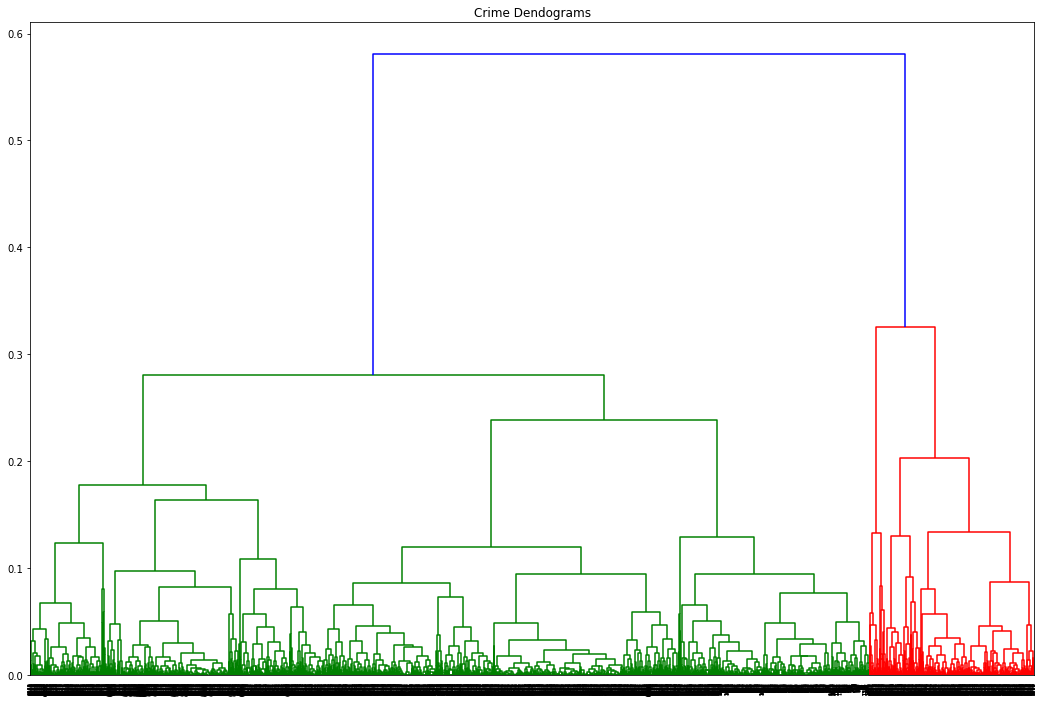

In [5]:
linked = linkage(df, 'complete')

labelList = range(1, len(df['Latitude'])+1)

plt.figure(figsize=(18,12))  
plt.title("Crime Dendograms")  

dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [6]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='manhattan', linkage='average')  
cluster.fit_predict(df)

array([3, 3, 3, ..., 0, 0, 0], dtype=int64)

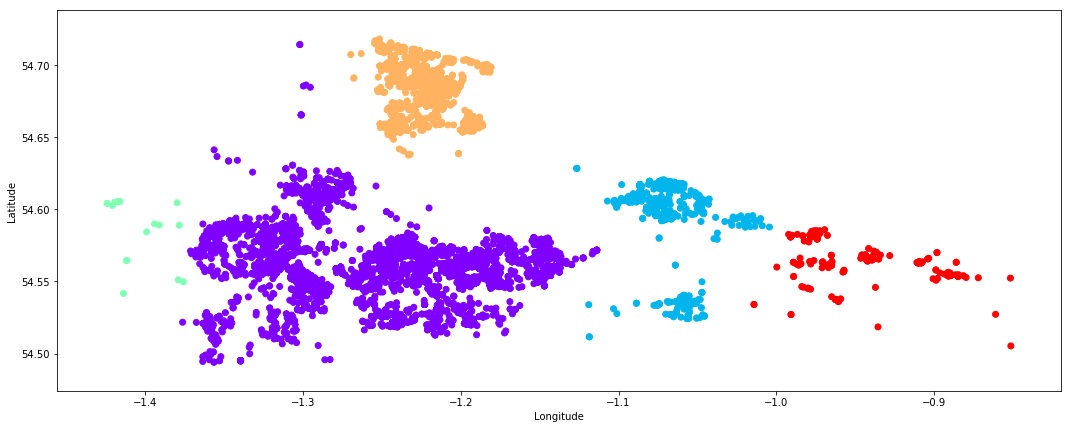

In [7]:
a1 = df['Longitude'].values
a2 = df['Latitude'].values
plt.figure(figsize=(18,7))  
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(a1, a2, c=cluster.labels_, cmap='rainbow')